# Laboratory excercise 1 and 2
The notebook contains excercise connected to the auditory excerices 1 and 2. For any questions feel free to contact assistans: eda.jovicic@fer.hr and filip.tomas@fer.hr

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

1. Load the dataset *student_score.csv*. When loading the dataset watch out for the index column. 

In [4]:
students_score = pd.read_csv('students_score.csv', index_col = 0)
students_score.head()

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


2. Print the size of the dataset. List the number of examples and the number of features. 

In [5]:
#size
students_score.shape

(30641, 15)

In [6]:
# number of examples - no. of rows
len(students_score)

30641

In [7]:
# number of features - no. of columns
len(students_score.columns)

15

In [8]:
students_score.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30641 entries, 0 to 960
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentId            30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29738 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)
memory 

3. Show the first 5 examples of the dataset. 

In [9]:
students_score.head()

,StudentId,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,520645,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,303683,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,457351,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,812988,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,594678,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


4. Using the third example from the dataset print for every feature the type of data (int, float, string or bool).

In [13]:
for i in range(len(students_score.columns)):
    print(list(students_score.columns)[i], "feature of third example is:", students_score.iloc[2, i], \
          "and is of type", type(students_score.iloc[2, i]))

StudentId feature of third example is: 457351 and is of type <class 'numpy.int64'>
Gender feature of third example is: female and is of type <class 'str'>
EthnicGroup feature of third example is: group B and is of type <class 'str'>
ParentEduc feature of third example is: master's degree and is of type <class 'str'>
LunchType feature of third example is: standard and is of type <class 'str'>
TestPrep feature of third example is: none and is of type <class 'str'>
ParentMaritalStatus feature of third example is: single and is of type <class 'str'>
PracticeSport feature of third example is: sometimes and is of type <class 'str'>
IsFirstChild feature of third example is: yes and is of type <class 'str'>
NrSiblings feature of third example is: 4.0 and is of type <class 'numpy.float64'>
TransportMeans feature of third example is: school_bus and is of type <class 'str'>
WklyStudyHours feature of third example is: < 5 and is of type <class 'str'>
MathScore feature of third example is: 87 and i

5. For numerical features print the value of mean, standard deviation and median. 


In [14]:
students_score.describe()
# all in the table, median is the 50% row

,StudentId,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,549614.852257,2.147305,66.558402,69.377533,68.418622
std,257913.251180,1.466746,15.361616,14.758952,15.443525
min,100024.000000,0.000000,0.000000,10.000000,4.000000
25%,328156.000000,1.000000,56.000000,59.000000,58.000000
50%,550904.000000,2.000000,67.000000,70.000000,69.000000
75%,771876.000000,3.000000,78.000000,80.000000,79.000000
max,999992.000000,26.000000,100.000000,100.000000,100.000000


In [15]:
students_score['StudentId'].median()

550904.0

6. Check if there are any monotonous attributes. If you find a monotonous attribute, remove it from the dataset.

In [16]:
students_score.nunique()

StudentId              30641
Gender                     2
EthnicGroup                5
ParentEduc                 6
LunchType                  2
TestPrep                   2
ParentMaritalStatus        4
PracticeSport              3
IsFirstChild              12
NrSiblings                11
TransportMeans             2
WklyStudyHours             3
MathScore                 95
ReadingScore              90
WritingScore              93
dtype: int64

In [17]:
students_score['StudentId'].is_monotonic_increasing

False

In [18]:
students_score['StudentId'].is_monotonic_decreasing

False

In [19]:
#students_score['StudentId'].is_monotnic
#students_score.apply(lambda x: x.is_monotonic_increasing)
students_score.apply(lambda x: x.is_monotonic_decreasing)

StudentId              False
Gender                 False
EthnicGroup            False
ParentEduc             False
LunchType              False
TestPrep               False
ParentMaritalStatus    False
PracticeSport          False
IsFirstChild           False
NrSiblings             False
TransportMeans         False
WklyStudyHours         False
MathScore              False
ReadingScore           False
WritingScore           False
dtype: bool

In [20]:
# although StudentId does not change in monotonous way, 
# it is the candidate for monotonous attribute because it has unique value for each entry 
# StudentId does not contain relevant student information whatsoever

students_score.drop(('StudentId'), axis=1, inplace=True)

7. Check the data for missing values. Print the number of missing values for each feature.

In [21]:
students_score.isna().sum()
# students_score.isna() prints a table

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

8. Let's deal with the missing values. 

a) For the features EthnicGroup, ParentMaritalStatus and WklyStudyHours replace NaN values with the most common value.

b) For the feature ParentEduc replace NaN value with a string *no formal education*.

c) For the feature TestPrep replace NaN value with a string *none*.

d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values. 

e) For the feature NrSiblings replace the NaN value with the median value.

f) Finally, for the feature TransportMeans replace the NaN value with a string *walking*.




In [22]:
# a)

#students_score.groupby('EthnicGroup').value_counts()
print(students_score['EthnicGroup'].mode())
print(students_score['ParentMaritalStatus'].mode())
print(students_score['WklyStudyHours'].mode())

tmp = students_score.copy()
tmp.loc[tmp.EthnicGroup.isna(),'EthnicGroup'] = tmp.loc[:,'EthnicGroup'].mode()[0] #!!!
tmp.loc[tmp.ParentMaritalStatus.isna(),'ParentMaritalStatus'] = tmp.loc[:,'ParentMaritalStatus'].mode()[0]
tmp.loc[tmp.WklyStudyHours.isna(),'WklyStudyHours'] = tmp.loc[:,'WklyStudyHours'].mode()[0]

0    group C
Name: EthnicGroup, dtype: object
0    married
Name: ParentMaritalStatus, dtype: object
0    5 - 10
Name: WklyStudyHours, dtype: object


In [23]:
tmp.head()
# EthnicGroup of row 0 was NaN before

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [24]:
tmp.isna().sum()

Gender                    0
EthnicGroup               0
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus       0
PracticeSport           631
IsFirstChild            903
NrSiblings             1572
TransportMeans         3134
WklyStudyHours            0
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [25]:
# b) For the feature ParentEduc replace NaN value with a string no formal education.

tmp['ParentEduc'].iloc[15:25] # 22 and 24 are NaN


15      some high school
16           high school
17      some high school
18       master's degree
19    associate's degree
20           high school
21          some college
22                   NaN
23      some high school
24                   NaN
Name: ParentEduc, dtype: object

In [26]:
tmp.loc[tmp.ParentEduc.isna(),'ParentEduc'] = "no formal education"
tmp['ParentEduc'].iloc[15:25]

15       some high school
16            high school
17       some high school
18        master's degree
19     associate's degree
20            high school
21           some college
22    no formal education
23       some high school
24    no formal education
Name: ParentEduc, dtype: object

In [27]:
# c) For the feature TestPrep replace NaN value with a string none.

tmp['TestPrep'].iloc[0:10]

0         none
1          NaN
2         none
3         none
4         none
5         none
6    completed
7         none
8    completed
9         none
Name: TestPrep, dtype: object

In [28]:
tmp.loc[tmp.TestPrep.isna(),'TestPrep'] = "none"
tmp['TestPrep'].iloc[0:10]

0         none
1         none
2         none
3         none
4         none
5         none
6    completed
7         none
8    completed
9         none
Name: TestPrep, dtype: object

In [29]:
# d) For the features PracticeSport and IsFirstChild remove all the examples with NaN values.

tmp['PracticeSport'].iloc[40:50] #50


41    regularly
43    regularly
44    sometimes
45    sometimes
47    regularly
49    sometimes
50          NaN
51    regularly
52    regularly
53    sometimes
Name: PracticeSport, dtype: object

In [30]:
tmp = tmp.loc[tmp.PracticeSport.notnull(),:]
tmp['PracticeSport'].iloc[40:50] #50

41    regularly
43    regularly
44    sometimes
45    sometimes
47    regularly
49    sometimes
51    regularly
52    regularly
53    sometimes
54    regularly
Name: PracticeSport, dtype: object

In [31]:
tmp = tmp.loc[tmp.IsFirstChild.notnull(),:]

In [32]:
# e) For the feature NrSiblings replace the NaN value with the median value.

tmp['NrSiblings'].iloc[0:10]

# row 9 has NaN, median is calculated in a task before: it is 2.0

0    3.0
1    0.0
2    4.0
3    1.0
4    0.0
5    1.0
6    1.0
7    1.0
8    3.0
9    NaN
Name: NrSiblings, dtype: float64

In [33]:
tmp.loc[tmp.NrSiblings.isna(),'NrSiblings'] = tmp.loc[:,'NrSiblings'].median()

In [34]:
tmp['NrSiblings'].iloc[0:10]

0    3.0
1    0.0
2    4.0
3    1.0
4    0.0
5    1.0
6    1.0
7    1.0
8    3.0
9    2.0
Name: NrSiblings, dtype: float64

In [35]:
# f) Finally, for the feature TransportMeans replace the NaN value with a string walking.

tmp['TransportMeans'].iloc[0:10]

0    school_bus
1           NaN
2    school_bus
3           NaN
4    school_bus
5    school_bus
6       private
7       private
8       private
9       private
Name: TransportMeans, dtype: object

In [36]:
tmp.loc[tmp.TransportMeans.isna(),'TransportMeans'] = "walking"
tmp['TransportMeans'].iloc[0:10]

0    school_bus
1       walking
2    school_bus
3       walking
4    school_bus
5    school_bus
6       private
7       private
8       private
9       private
Name: TransportMeans, dtype: object

In [37]:
tmp.isna().sum()

Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

9. Are there inconsistencies in the IsFirstChild column? Replace the inconsistent entries so they match the rest of the values. 

In [39]:
tmp.groupby('IsFirstChild').size()
# there are inconsistencies

IsFirstChild
Yes             6
es              2
nein            5
no          10405
noo             7
nope            6
si              2
ye              6
yeah            4
yeah boy        2
yes         18669
ys              3
dtype: int64

In [40]:
#X['Title'] = X['Title'].replace('Mlle', 'Miss')

tmp['IsFirstChild'] = tmp['IsFirstChild'].replace(['Yes', 'es', 'si', 'ye', 'yeah', 'yeah boy', 'ys'], 'yes')
tmp['IsFirstChild'] = tmp['IsFirstChild'].replace(['nein','noo', 'nope'], 'no')

tmp.groupby('IsFirstChild').size()

IsFirstChild
no     10423
yes    18694
dtype: int64

10. The final step to preparing the dataset for classification is transforming the non-numeric variables to numeric variables. 
For features Gender and LunchType use OneHot Encoder, and for EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours use Label Encoder. 

In [41]:
# Gender and LunchType - OneHot

#encoder = OneHotEncoder(handle_unknown="ignore")
#encoder.fit(X[['Title']])
#X_tmp = encoder.transform(X[['Title']])
#X_tmp = pd.DataFrame(X_tmp.toarray(), columns=encoder.get_feature_names_out(['Title']))
#X_tmp

encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(tmp[['Gender']])
X_tmp = encoder.transform(tmp[['Gender']])
X_tmp = pd.DataFrame(X_tmp.toarray(), columns=encoder.get_feature_names_out(['Gender']))
X_tmp



,Gender_female,Gender_male
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0
...,...,...
29112,1.0,0.0
29113,0.0,1.0
29114,1.0,0.0
29115,1.0,0.0


In [205]:
# tmp = pd.concat((tmp, X_tmp), axis=1)
# InvalidIndexError: Reindexing only valid with uniquely valued Index objects
# Duplicated column names!

#df = tmp.reset_index()
#df.reset_index(inplace=True, drop=True)
#df = pd.concat((df, X_tmp), axis=1)
#df.head()

In [45]:
tmp.reset_index(inplace=True, drop=True)
tmp = pd.concat((tmp, X_tmp), axis=1)


In [46]:
tmp.shape

(29117, 16)

In [47]:
tmp.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,1.0,0.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,walking,5 - 10,69,90,88,1.0,0.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,walking,5 - 10,45,56,42,0.0,1.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0.0,1.0


In [48]:
encoder = OneHotEncoder(handle_unknown="ignore")
encoder.fit(tmp[['LunchType']])
X_tmp = encoder.transform(tmp[['LunchType']])
X_tmp = pd.DataFrame(X_tmp.toarray(), columns=encoder.get_feature_names_out(['LunchType']))
X_tmp

,LunchType_free/reduced,LunchType_standard
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0
...,...,...
29112,0.0,1.0
29113,0.0,1.0
29114,1.0,0.0
29115,0.0,1.0


In [49]:
#tmp.reset_index(inplace=True, drop=True)
tmp = pd.concat((tmp, X_tmp), axis=1)


In [50]:
tmp.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,1.0,0.0,0.0,1.0
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,walking,5 - 10,69,90,88,1.0,0.0,0.0,1.0
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0.0,0.0,1.0
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,walking,5 - 10,45,56,42,0.0,1.0,1.0,0.0
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0.0,1.0,0.0,1.0


In [51]:
tmp = tmp.loc[:, ~tmp.columns.isin(['Gender', 'LunchType'])].copy()

In [52]:
tmp.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,group C,bachelor's degree,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,1.0,0.0,0.0,1.0
1,group C,some college,none,married,sometimes,yes,0.0,walking,5 - 10,69,90,88,1.0,0.0,0.0,1.0
2,group B,master's degree,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,1.0,0.0,0.0,1.0
3,group A,associate's degree,none,married,never,no,1.0,walking,5 - 10,45,56,42,0.0,1.0,1.0,0.0
4,group C,some college,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,0.0,1.0,0.0,1.0


In [53]:
# EthnicGroup, ParentEduc, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, TransportMeans and WklyStudyHours - Label

#le = LabelEncoder()
#le.fit(X.loc[:,'Sex'])
#X.loc[:,'Sex'] = le.transform(X.loc[:,'Sex'])

le = LabelEncoder()
le.fit(tmp.loc[:,'EthnicGroup'])
tmp.loc[:,'EthnicGroup'] = le.transform(tmp.loc[:,'EthnicGroup'])

le.fit(tmp.loc[:,'ParentEduc'])
tmp.loc[:,'ParentEduc'] = le.transform(tmp.loc[:,'ParentEduc'])

le.fit(tmp.loc[:,'TestPrep'])
tmp.loc[:,'TestPrep'] = le.transform(tmp.loc[:,'TestPrep'])

le.fit(tmp.loc[:,'ParentMaritalStatus'])
tmp.loc[:,'ParentMaritalStatus'] = le.transform(tmp.loc[:,'ParentMaritalStatus'])

le.fit(tmp.loc[:,'PracticeSport'])
tmp.loc[:,'PracticeSport'] = le.transform(tmp.loc[:,'PracticeSport'])

le.fit(tmp.loc[:,'IsFirstChild'])
tmp.loc[:,'IsFirstChild'] = le.transform(tmp.loc[:,'IsFirstChild'])

le.fit(tmp.loc[:,'TransportMeans'])
tmp.loc[:,'TransportMeans'] = le.transform(tmp.loc[:,'TransportMeans'])

le.fit(tmp.loc[:,'WklyStudyHours'])
tmp.loc[:,'WklyStudyHours'] = le.transform(tmp.loc[:,'WklyStudyHours'])

tmp.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


In [54]:
tmp.to_csv("students_score_handled.csv")

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [2]:
df = pd.read_csv('students_score_handled.csv', index_col=0)

In [3]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

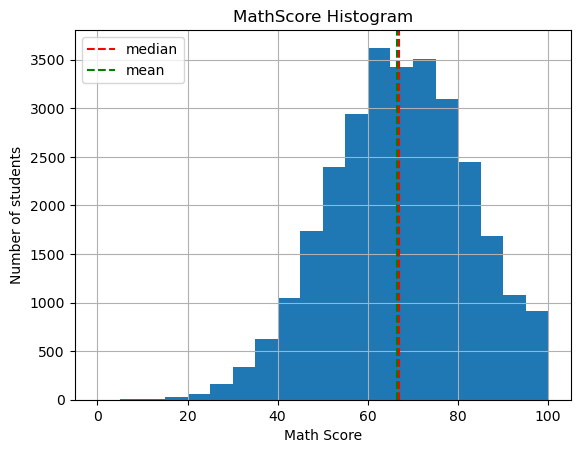

In [4]:
# a)

#df.columns - there exists 'MathScore'
#plt.hist(df.MathScore)
plt.hist(df.MathScore, bins=20)

# b) 
plt.axvline(df.MathScore.median(), color = 'red', linestyle=('dashed'), label = "median")
plt.axvline(df.MathScore.mean(), color = 'green', linestyle=('dashed'), label = "mean")

# c)

plt.title("MathScore Histogram")
plt.xlabel('Math Score')
plt.ylabel('Number of students')

# d)

plt.grid()

# e)

plt.legend(loc='upper left')

plt.show()


3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

In [5]:
df.groupby('NrSiblings').size()

NrSiblings
0.0     2860
1.0     7818
2.0     7954
3.0     5853
4.0     2794
5.0     1265
6.0      289
7.0      281
10.0       1
12.0       1
26.0       1
dtype: int64

[2860 7818 7954 5853 2794 1265  289  281    1    1    1]


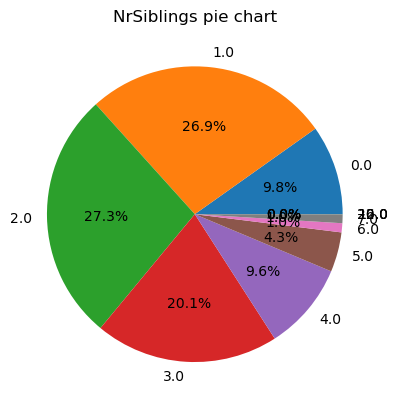

In [6]:
# first solution
# a)

count_per_siblings = df.groupby('NrSiblings').count().loc[:,'EthnicGroup'].values
print(df.groupby('NrSiblings').count().loc[:, 'EthnicGroup'].values) #any column can be used for locating values
percent = (count_per_siblings/len(df))*100

# b)

nr_siblings = df.groupby('NrSiblings').count().index.values

# c)

plt.pie(percent, labels=nr_siblings, autopct='%1.1f%%', radius = 1)
#plt.tight_layout()

# d)

plt.title("NrSiblings pie chart")
plt.show()

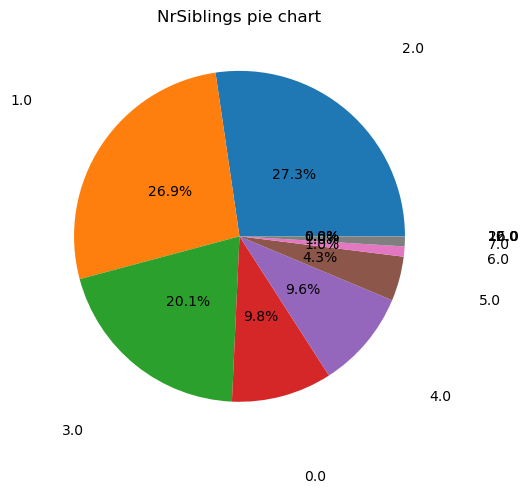

In [7]:
# second solution
# a), b), c)

df["NrSiblings"].value_counts().plot(kind="pie", autopct='%1.1f%%', labeldistance=1.5, pctdistance=0.5, ylabel='')

# however, this solution has percentages ordered in the chart representation, not the categories as the solution above

# d)

plt.tight_layout()
plt.title("NrSiblings pie chart")
plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

In [8]:
df.nunique()

EthnicGroup                5
ParentEduc                 7
TestPrep                   2
ParentMaritalStatus        4
PracticeSport              3
IsFirstChild               2
NrSiblings                11
TransportMeans             3
WklyStudyHours             3
MathScore                 95
ReadingScore              90
WritingScore              93
Gender_female              2
Gender_male                2
LunchType_free/reduced     2
LunchType_standard         2
dtype: int64

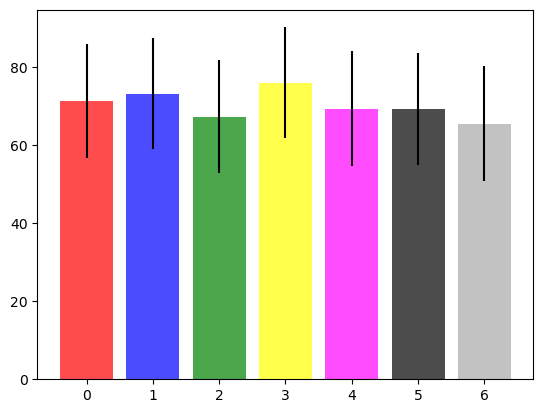

In [9]:
# a)

zero_mean = df.loc[df.loc[:,'ParentEduc'] == 0, 'ReadingScore'].mean()
zero_std = df.loc[df.loc[:,'ParentEduc'] == 0, 'ReadingScore'].std()
one_mean = df.loc[df.loc[:,'ParentEduc'] == 1, 'ReadingScore'].mean()
one_std = df.loc[df.loc[:,'ParentEduc'] == 1, 'ReadingScore'].std()
two_mean = df.loc[df.loc[:,'ParentEduc'] == 2, 'ReadingScore'].mean()
two_std = df.loc[df.loc[:,'ParentEduc'] == 2, 'ReadingScore'].std()
three_mean = df.loc[df.loc[:,'ParentEduc'] == 3, 'ReadingScore'].mean()
three_std = df.loc[df.loc[:,'ParentEduc'] == 3, 'ReadingScore'].std()
four_mean = df.loc[df.loc[:,'ParentEduc'] == 4, 'ReadingScore'].mean()
four_std = df.loc[df.loc[:,'ParentEduc'] == 4, 'ReadingScore'].std()
five_mean = df.loc[df.loc[:,'ParentEduc'] == 5, 'ReadingScore'].mean()
five_std = df.loc[df.loc[:,'ParentEduc'] == 5, 'ReadingScore'].std()
six_mean = df.loc[df.loc[:,'ParentEduc'] == 6, 'ReadingScore'].mean()
six_std = df.loc[df.loc[:,'ParentEduc'] == 6, 'ReadingScore'].std()

reading_per_parenteduc_mean = [zero_mean, one_mean, two_mean, three_mean, four_mean, five_mean, six_mean]
reading_per_parenteduc_std = [zero_std, one_std, two_std, three_std, four_std, five_std, six_std]

parent_educ = df.groupby('ParentEduc').count().index.values

# b), c)

plt.bar(parent_educ, reading_per_parenteduc_mean, \
        color=['red', 'blue', 'green', 'yellow', 'magenta', 'black', 'darkgray'], alpha=0.7, yerr=reading_per_parenteduc_std)
plt.show()


5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

Text(0.5, 0, 'TransportMeans')

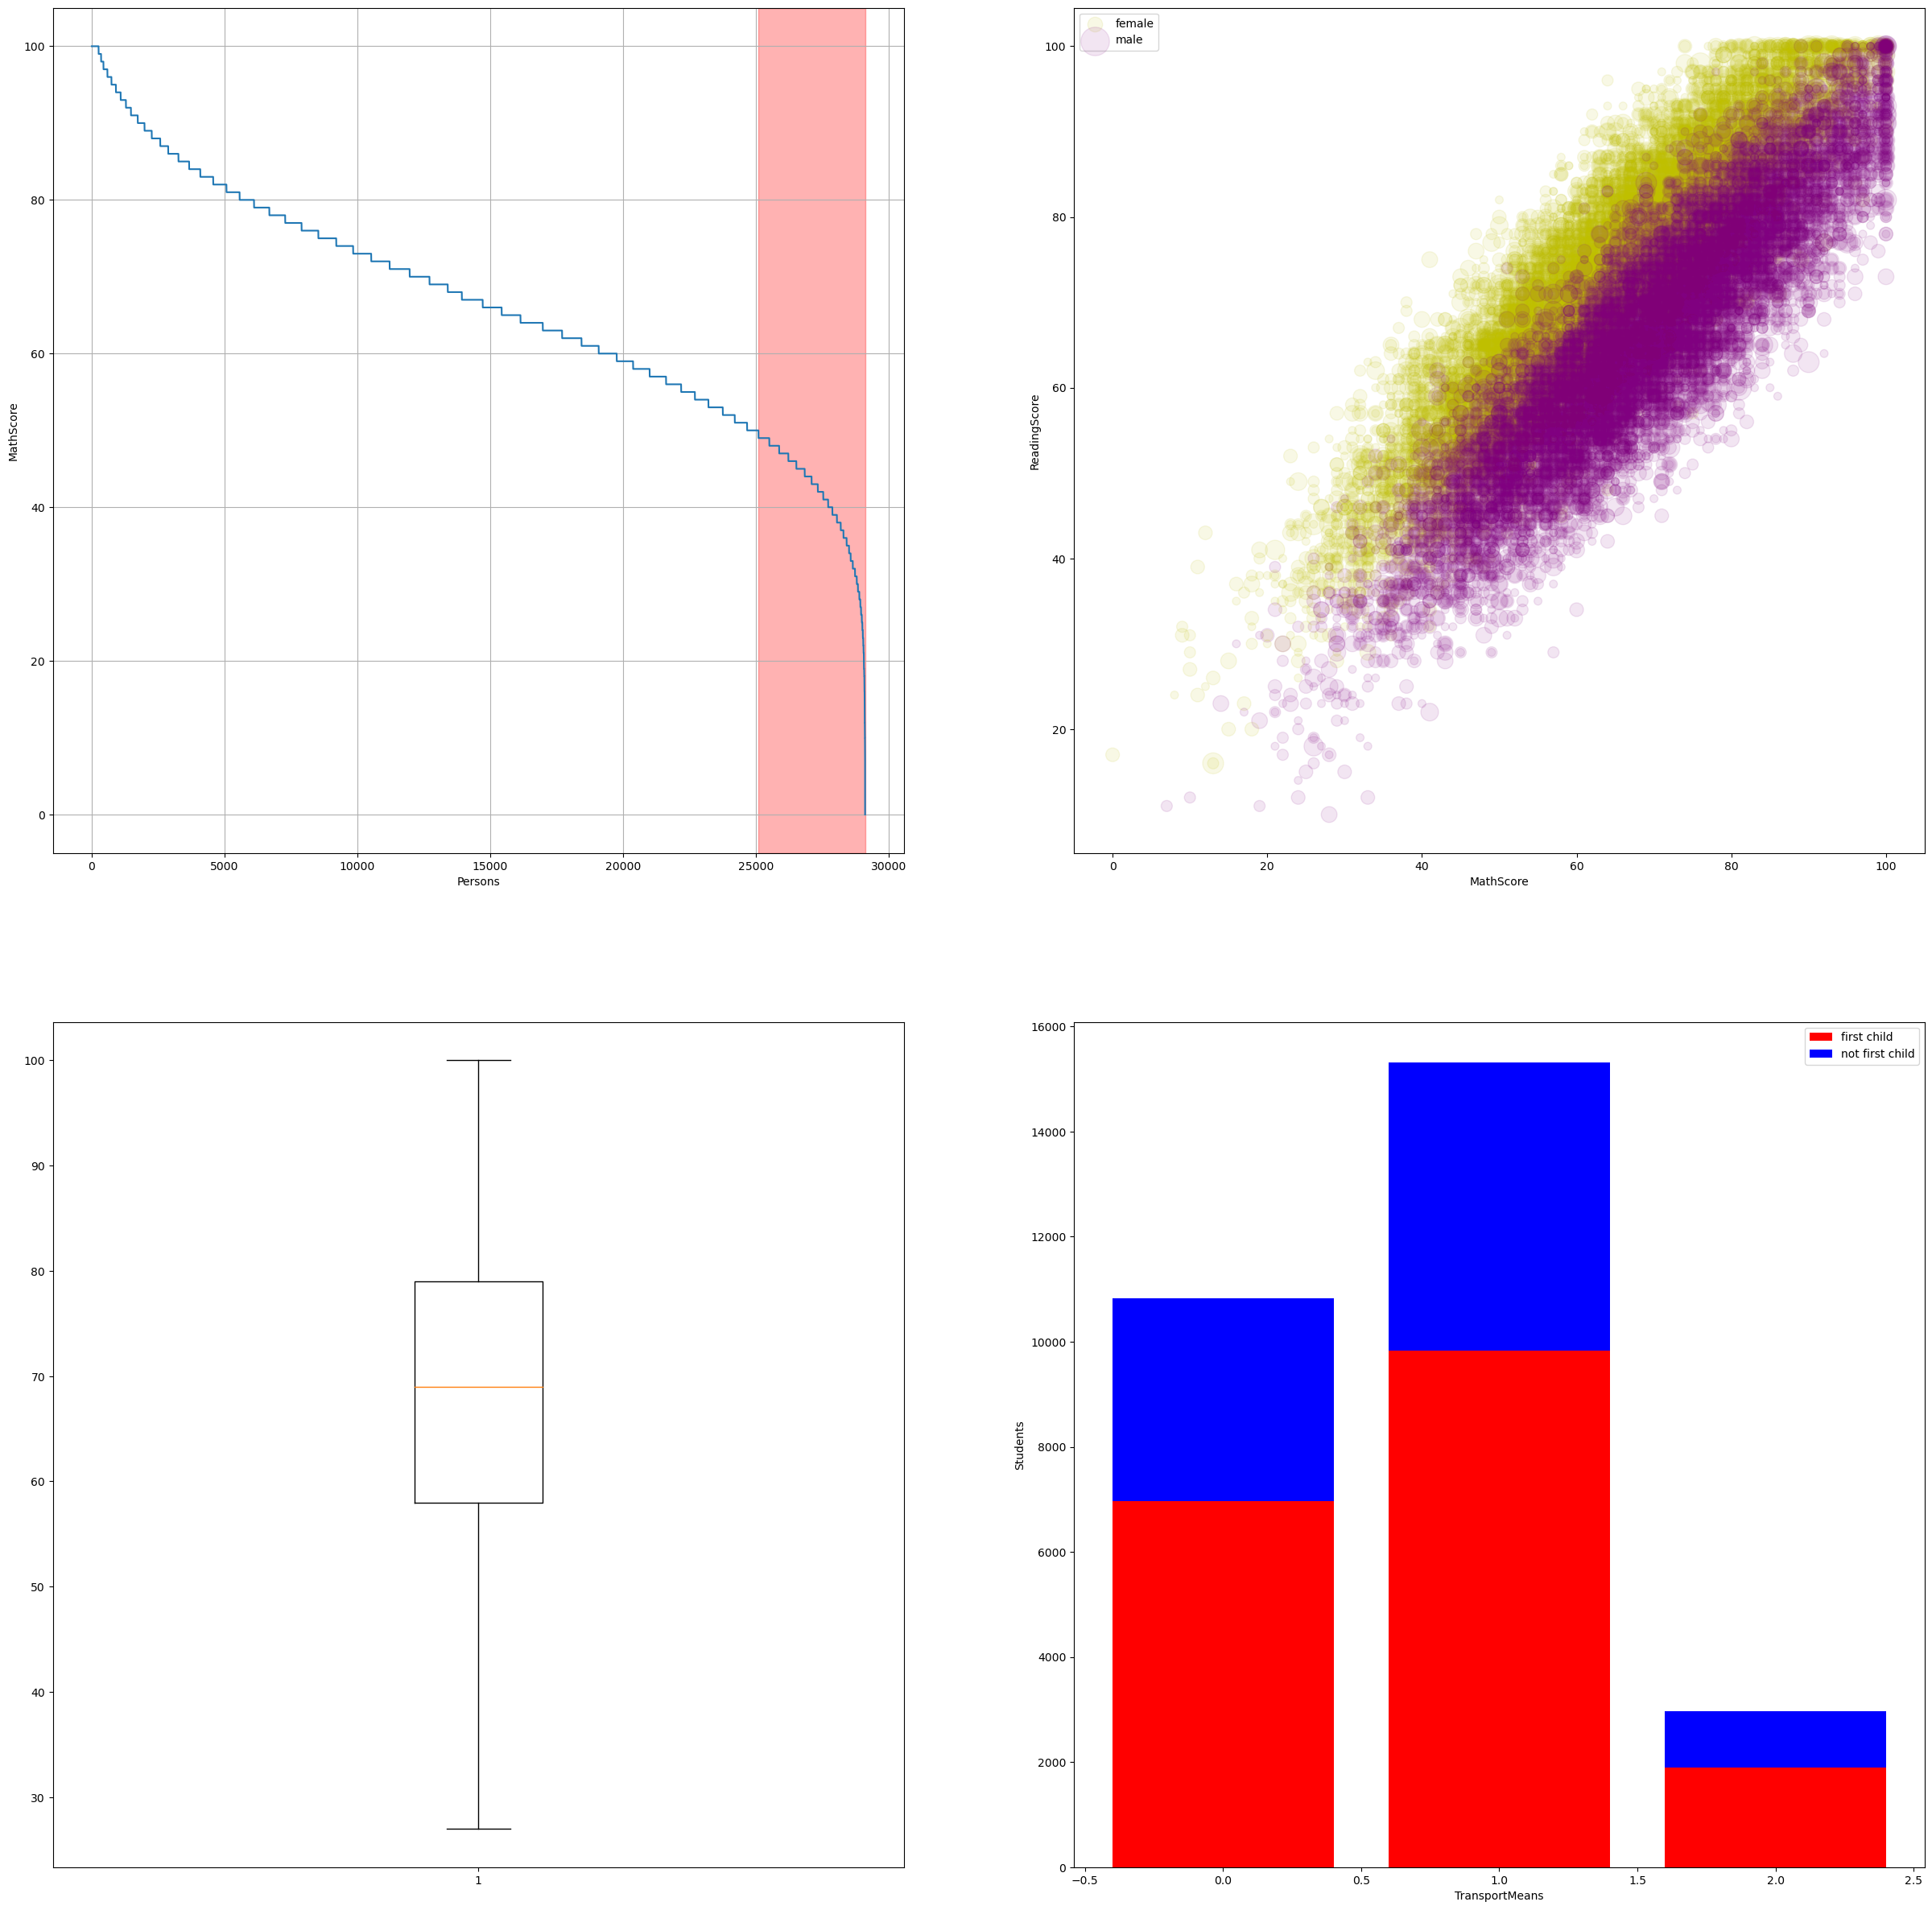

In [10]:
'''
import sys
np.set_printoptions(threshold=sys.maxsize)
print(ax[0,0].lines[0].get_data())

'''
# a)

fig, ax = plt.subplots(2,2, figsize=(30,30)) 

# b)

df_tmp = df.copy()
sorted_mathscore = df_tmp.sort_values(by=['MathScore'], ascending=False).MathScore.values
person = [x for x in range(len(df_tmp.index))]

ax[0,0].plot(person, sorted_mathscore)
ax[0,0].grid()
#print(np.where(sorted_mathscore==50)[0][0]) # 24673
#print(np.where(sorted_mathscore==49)[0][0]) # 25101
#ax[0,0].axvspan(ymin=0, ymax=0.5, xmin=24673, xmax=len(df_tmp.index), color='r', alpha=0.3) 
ax[0,0].axvspan(xmin=25101, xmax=len(df_tmp.index), color='r', alpha=0.3) #only strictly less than 50, only x-axis 
ax[0,0].set_xlabel('Persons')
ax[0,0].set_ylabel('MathScore')

# c)

#ax[0,1].scatter(df_tmp.MathScore, df_tmp.ReadingScore)

mask_gender = df_tmp.Gender_female == 1
sizes = df_tmp.NrSiblings*50

ax[0,1].scatter(df_tmp.loc[mask_gender,'MathScore'], df_tmp.loc[mask_gender,'ReadingScore'], \
            s=sizes[mask_gender], alpha=0.1, c='y', label='female')
ax[0,1].scatter(df_tmp.loc[~mask_gender,'MathScore'], df_tmp.loc[~mask_gender,'ReadingScore'], \
            s=sizes[~mask_gender], alpha=0.1, c='purple', label='male')
ax[0,1].set_xlabel('MathScore')
ax[0,1].set_ylabel('ReadingScore')
ax[0,1].legend(loc='best')

# d)
#ax[1,0].boxplot(df_tmp.WritingScore)
ax[1,0].boxplot(df_tmp.WritingScore, showfliers=False)

# e) 0 - private, 1 - school bus, 2 - walking

#count_per_transport = df_tmp.groupby('TransportMeans').count().loc[:,'EthnicGroup'].values
#transport_label = df_tmp.groupby('TransportMeans').count().index.values

mask_firstchild = df_tmp.IsFirstChild == 1

count_per_transport_firstchild = df_tmp.loc[mask_firstchild,:].groupby('TransportMeans').count().loc[:,'EthnicGroup'].values
count_per_transport_notfirstchild = df_tmp.loc[~mask_firstchild,:].groupby('TransportMeans').count().loc[:,'EthnicGroup'].values
transport_label = df_tmp.groupby('TransportMeans').count().index.values

#ax[1,1].barh(transport_label, count_per_transport)
#ax[1,1].barh(transport_label, count_per_transport_firstchild, color='red', label='first child')
#ax[1,1].barh(transport_label, count_per_transport_notfirstchild, color='blue', \
#             label='not first child', left=count_per_transport_firstchild)
ax[1,1].bar(transport_label, count_per_transport_firstchild, color='red', label='first child')
ax[1,1].bar(transport_label, count_per_transport_notfirstchild, color='blue', \
             label='not first child', bottom=count_per_transport_firstchild)
ax[1,1].legend(loc='best')
ax[1,1].set_ylabel('Students')
ax[1,1].set_xlabel('TransportMeans')


6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

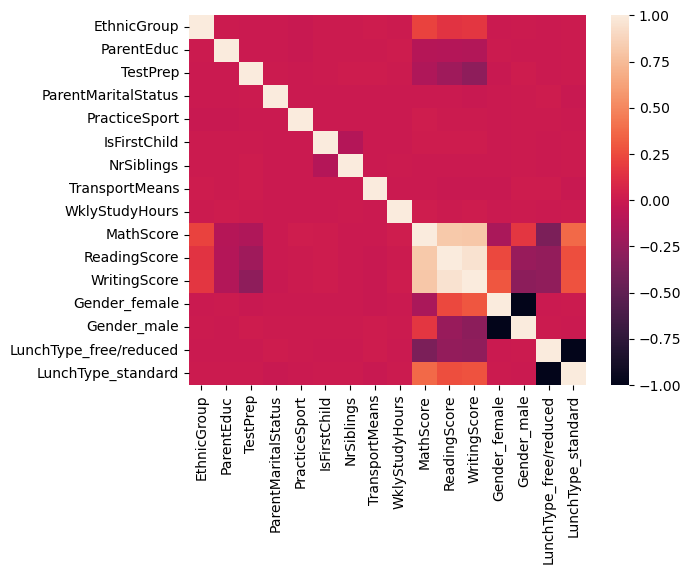

<Axes: >

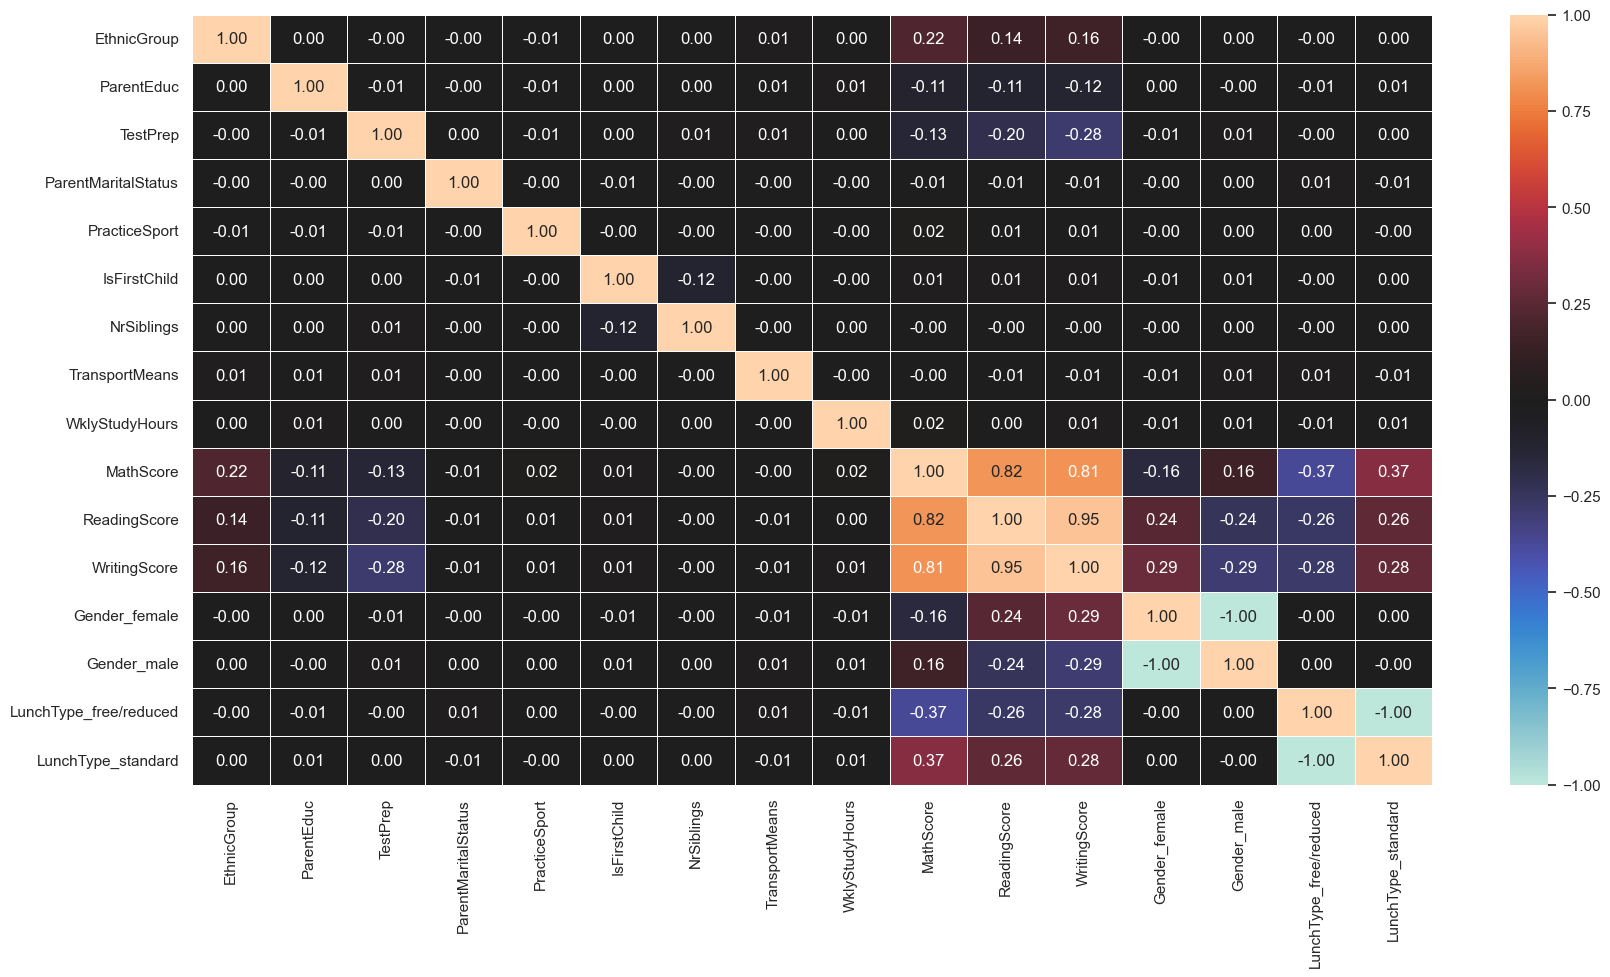

In [42]:
# all features are numerical (the task of the first homework was to obtain only numerical features)

# a)

sns.heatmap(df.corr())
plt.show()

# b)

sns.set(rc={'figure.figsize':(20,10)})

# c), d)

sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="icefire", linewidths=.5)

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


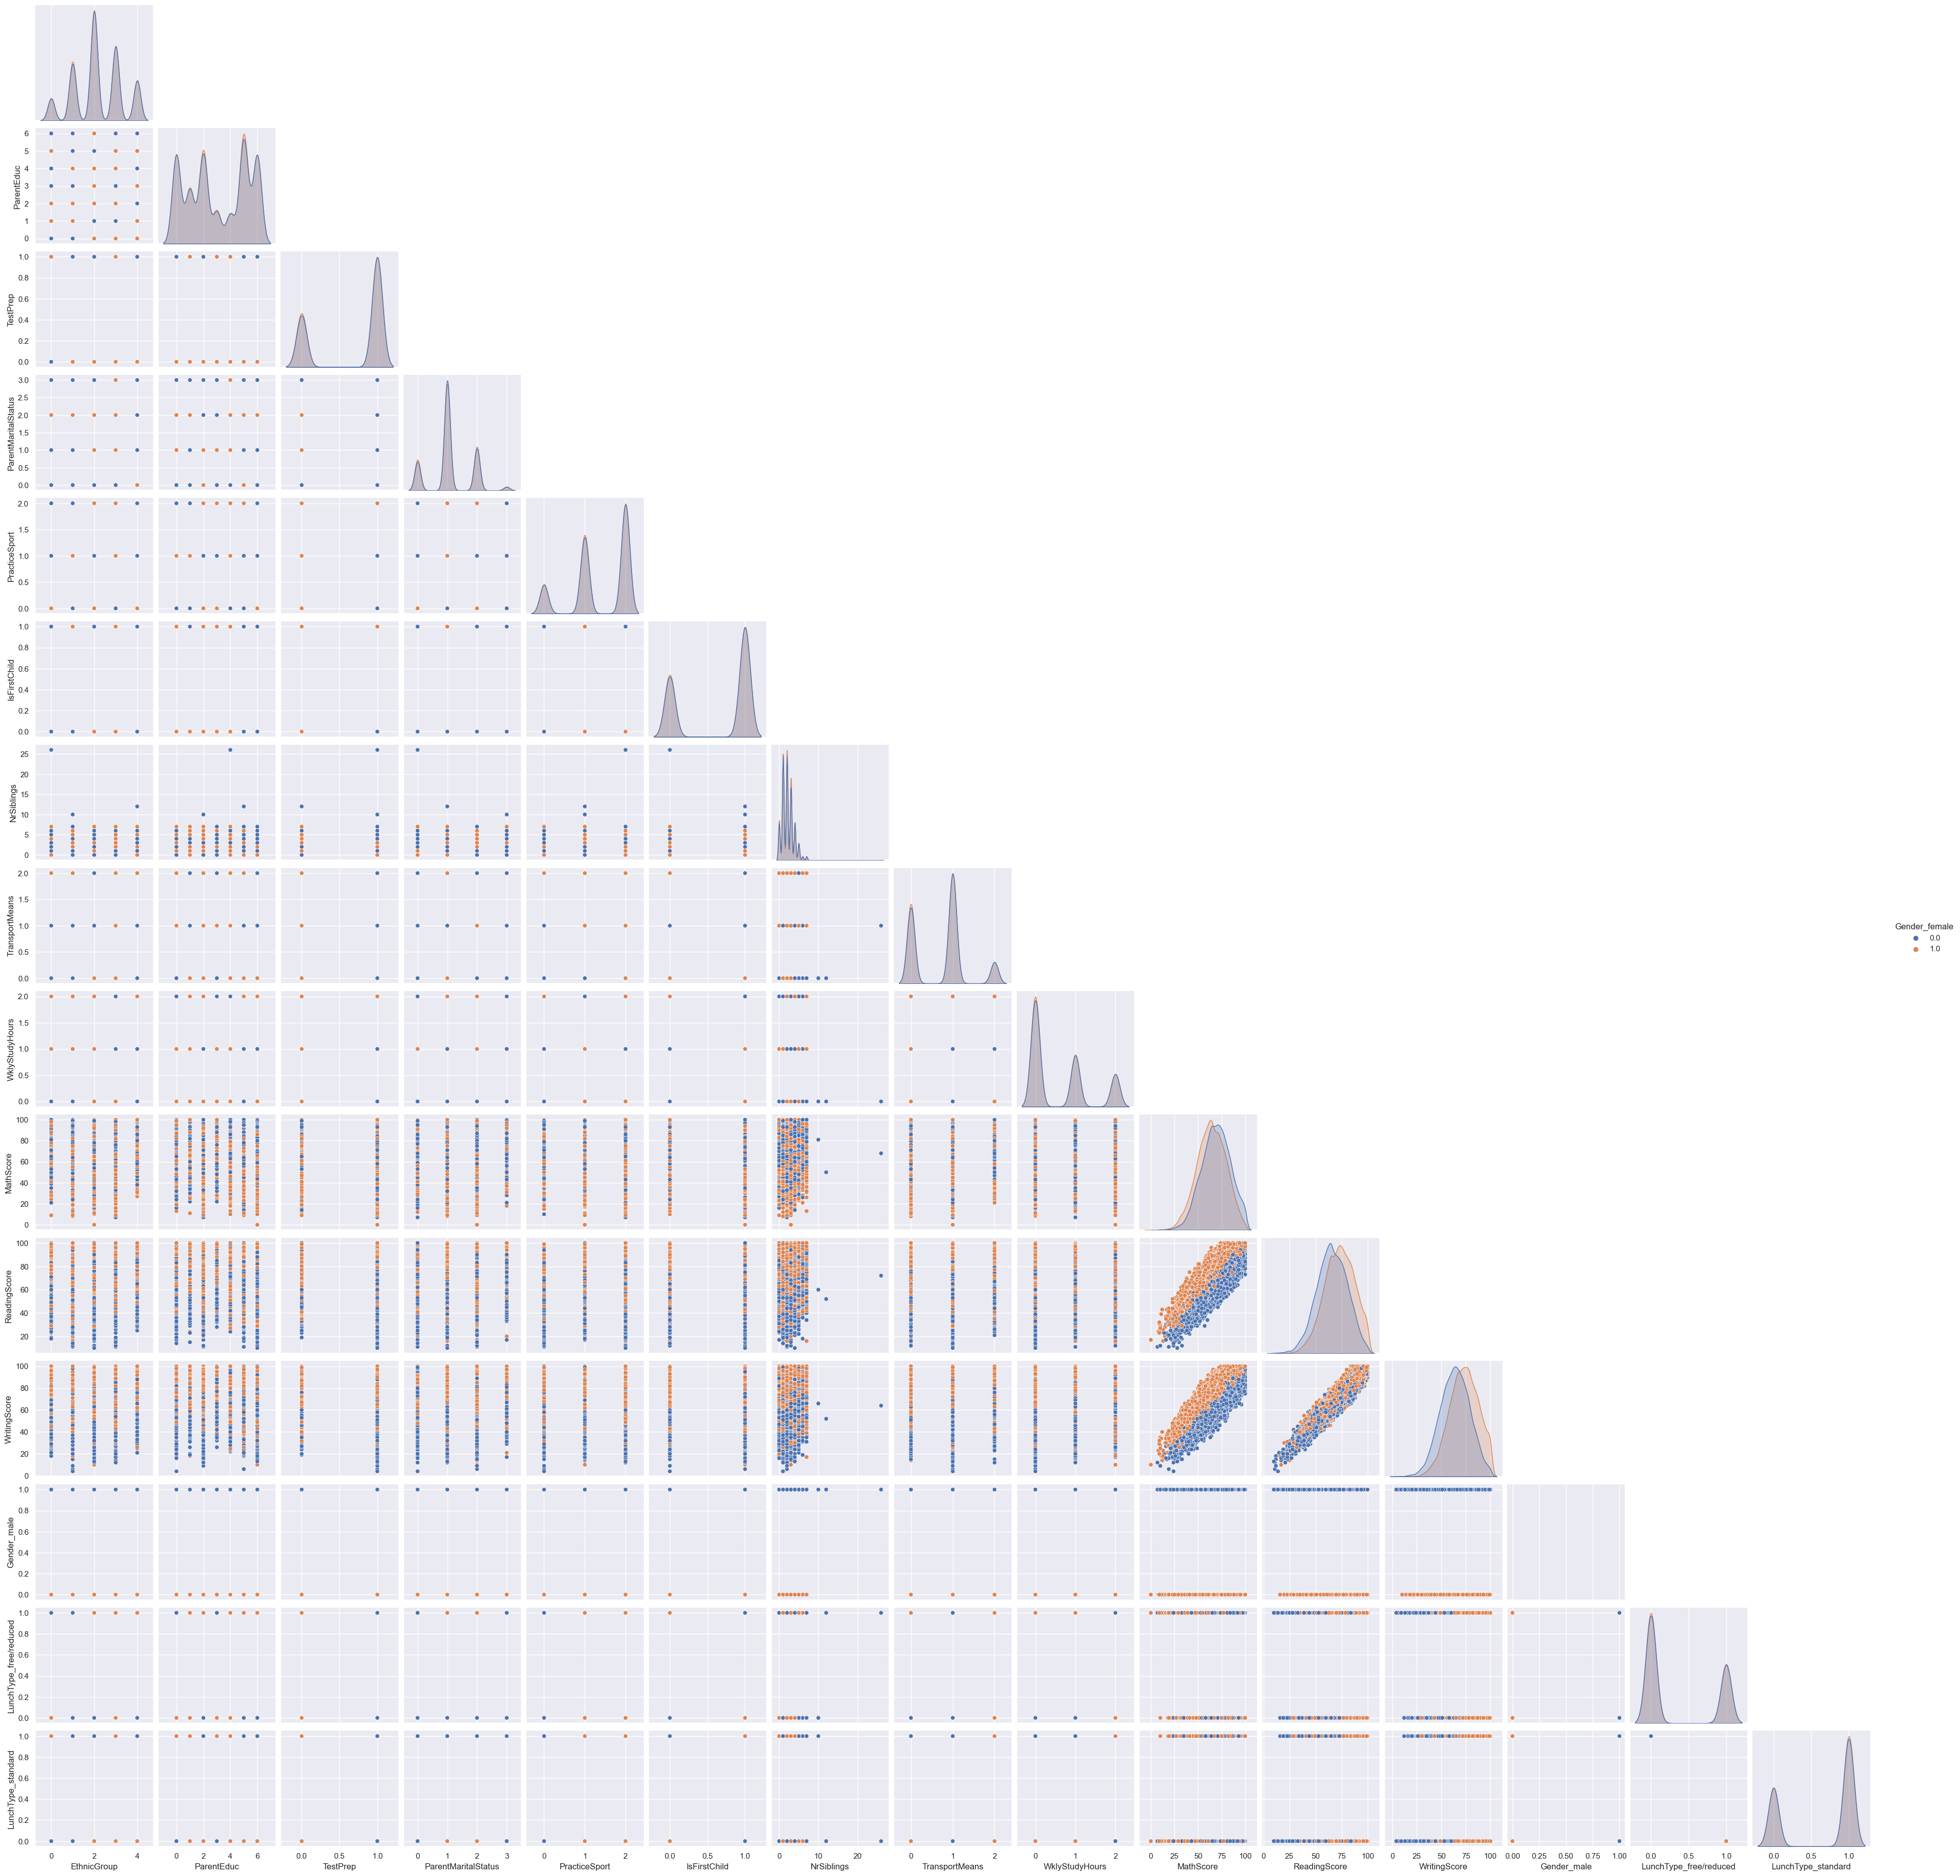

In [43]:
# a), b), c)

#sns.pairplot(df.loc[:,:])
sns.pairplot(df.loc[:,:], hue='Gender_female', corner=True)
plt.show()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy import stats

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [3]:
df = pd.read_csv('students_score_handled.csv', index_col=0)

In [4]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [7]:
# a) average scores (referring to Lecture 4) - mean, joint mean, median, mode, geometric mean, harmonic mean

# MathScore

print('MathScore mean: ', df['MathScore'].mean())
print('MathScore median: ', df['MathScore'].median())
print('MathScore mode: ', df['MathScore'].mode())
print('MathScore geometric mean: ', stats.gmean(df.loc[:,'MathScore'])) # 0 - someone clearly had 0 points
print('MathScore harmonic mean: ', stats.hmean(df.loc[:,'MathScore'])) 
print('')

print('ReadingScore mean: ', df['ReadingScore'].mean())
print('ReadingScore median: ', df['ReadingScore'].median())
print('ReadingScore mode: ', df['ReadingScore'].mode())
print('ReadingScore geometric mean: ', stats.gmean(df.loc[:,'ReadingScore']))
print('ReadingScore harmonic mean: ', stats.hmean(df.loc[:,'ReadingScore'])) 
print('')

print('WritingScore mean: ', df['WritingScore'].mean())
print('WritingScore median: ', df['WritingScore'].median())
print('WritingScore mode: ', df['WritingScore'].mode())
print('WritingScore geometric mean: ', stats.gmean(df.loc[:,'WritingScore']))
print('WritingScore harmonic mean: ', stats.hmean(df.loc[:,'WritingScore']))
print('')

# b) Find the mean, median and average scores for males and females.

female = df.query('Gender_female==1')
male = df.query('Gender_male==1')

print('MathScore mean female: ', female['MathScore'].mean())
print('MathScore median female: ', female['MathScore'].median())
print('MathScore mode female: ', female['MathScore'].mode())
print('MathScore geometric mean female: ', stats.gmean(female.loc[:,'MathScore'])) 
print('MathScore harmonic mean female: ', stats.hmean(female.loc[:,'MathScore'])) 
print('')

print('ReadingScore mean female: ', female['ReadingScore'].mean())
print('ReadingScore median female: ', female['ReadingScore'].median())
print('ReadingScore mode female: ', female['ReadingScore'].mode())
print('ReadingScore geometric mean female: ', stats.gmean(female.loc[:,'ReadingScore']))
print('ReadingScore harmonic mean female: ', stats.hmean(female.loc[:,'ReadingScore'])) 
print('')

print('WritingScore mean female: ', female['WritingScore'].mean())
print('WritingScore median female: ', female['WritingScore'].median())
print('WritingScore mode female: ', female['WritingScore'].mode())
print('WritingScore geometric mean female: ', stats.gmean(female.loc[:,'WritingScore']))
print('WritingScore harmonic mean female: ', stats.hmean(female.loc[:,'WritingScore']))
print('')

print('MathScore mean male: ', male['MathScore'].mean())
print('MathScore median male: ', male['MathScore'].median())
print('MathScore mode male: ', male['MathScore'].mode())
print('MathScore geometric mean male: ', stats.gmean(male.loc[:,'MathScore'])) 
print('MathScore harmonic mean male: ', stats.hmean(male.loc[:,'MathScore'])) 
print('')

print('ReadingScore mean male: ', male['ReadingScore'].mean())
print('ReadingScore median male: ', male['ReadingScore'].median())
print('ReadingScore mode male: ', male['ReadingScore'].mode())
print('ReadingScore geometric mean male: ', stats.gmean(male.loc[:,'ReadingScore']))
print('ReadingScore harmonic mean male: ', stats.hmean(male.loc[:,'ReadingScore'])) 
print('')

print('WritingScore mean male: ', male['WritingScore'].mean())
print('WritingScore median male: ', male['WritingScore'].median())
print('WritingScore mode male: ', male['WritingScore'].mode())
print('WritingScore geometric mean male: ', stats.gmean(male.loc[:,'WritingScore']))
print('WritingScore harmonic mean male: ', stats.hmean(male.loc[:,'WritingScore']))
print('')


# c) coeff. of variation

print('MathScore cv: ', df['MathScore'].std() / df['MathScore'].mean() * 100)
print('ReadingScore cv: ', df['ReadingScore'].std() / df['ReadingScore'].mean() * 100)
print('WritingScore cv: ', df['WritingScore'].std() / df['WritingScore'].mean() * 100)
print('')

print('MathScore cv female: ', female['MathScore'].std() / female['MathScore'].mean() * 100)
print('ReadingScore cv female: ', female['ReadingScore'].std() / female['ReadingScore'].mean() * 100)
print('WritingScore cv female: ', female['WritingScore'].std() / female['WritingScore'].mean() * 100)
print('')

print('MathScore cv male: ', male['MathScore'].std() / male['MathScore'].mean() * 100)
print('ReadingScore cv male: ', male['ReadingScore'].std() / male['ReadingScore'].mean() * 100)
print('WritingScore cv male: ', male['WritingScore'].std() / male['WritingScore'].mean() * 100)


MathScore mean:  66.55994779681973
MathScore median:  67.0
MathScore mode:  0    64
Name: MathScore, dtype: int64
MathScore geometric mean:  0.0
MathScore harmonic mean:  0.0

ReadingScore mean:  69.39008139574818
ReadingScore median:  70.0
ReadingScore mode:  0    65
Name: ReadingScore, dtype: int64
ReadingScore geometric mean:  67.66668157387164
ReadingScore harmonic mean:  65.70263364431344

WritingScore mean:  68.42933681354535
WritingScore median:  69.0
WritingScore mode:  0    67
Name: WritingScore, dtype: int64
WritingScore geometric mean:  66.50129535980764
WritingScore harmonic mean:  64.25892028771429

MathScore mean female:  64.11941926249062
MathScore median female:  64.0
MathScore mode female:  0    64
Name: MathScore, dtype: int64
MathScore geometric mean female:  0.0
MathScore harmonic mean female:  0.0

ReadingScore mean female:  72.900824756322
ReadingScore median female:  73.0
ReadingScore mode female:  0    65
Name: ReadingScore, dtype: int64
ReadingScore geometric m

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [8]:
female_sample = female.sample(n=500, random_state=1) 
male_sample = male.sample(n=500, random_state=1)

mathscore_normal = np.array([np.mean(df[df["Gender_female"]==1].sample(100)["MathScore"].values) for i in range(500)])
female_sample['MathScore_normal'] = mathscore_normal

mathscore_normal_m = np.array([np.mean(df[df["Gender_male"]==1].sample(100)["MathScore"].values) for i in range(500)])
male_sample['MathScore_normal'] = mathscore_normal_m

In [9]:
# ANOVA - Tests whether the means of two or more independent samples are significantly different.

from scipy.stats import f_oneway
stat, p = f_oneway(female_sample['MathScore_normal'],male_sample['MathScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2804.588, p=0.000
Probably different distributions


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [11]:
# z-test

from statsmodels.stats.weightstats import ztest as ztest

In [12]:
writing_normal = np.array([np.mean(df[df["Gender_female"]==1].sample(100)["WritingScore"].values) for i in range(500)])
female_sample['WritingScore_normal'] = writing_normal

writing_normal_m = np.array([np.mean(df[df["Gender_male"]==1].sample(100)["WritingScore"].values) for i in range(500)])
male_sample['WritingScore_normal'] = writing_normal_m

In [19]:
#female_sample['WritingScore_normal'].hist()
#female_sample['WritingScore].hist()

In [13]:
# two-sample z-test

ztest(female_sample['WritingScore_normal'], male_sample['WritingScore_normal'], value=0) 

(94.69653632926345, 0.0)

In [14]:
ztest(female_sample['WritingScore_normal'], value=0)

(1106.2135297846228, 0.0)

In [15]:
ztest(male_sample['WritingScore_normal'], value=0)

(954.8781967332455, 0.0)

5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

In [20]:
reading_normal = np.array([np.mean(df[df["Gender_female"]==1].sample(100)["ReadingScore"].values) for i in range(500)])
female_sample['ReadingScore_normal'] = reading_normal

reading_normal_m = np.array([np.mean(df[df["Gender_male"]==1].sample(100)["ReadingScore"].values) for i in range(500)])
male_sample['ReadingScore_normal'] = reading_normal_m

In [21]:
# Shapiro-Wilk - Gaussian

from scipy.stats import shapiro
for i in ['MathScore_normal', 'WritingScore_normal', 'ReadingScore_normal']:
    stat, p = shapiro(female_sample[i])
    print('female %s stat=%.3f, p=%.3f' % (i, stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

print('')
        
for i in ['MathScore_normal', 'WritingScore_normal', 'ReadingScore_normal']:
    stat, p = shapiro(male_sample[i])
    print('male %s stat=%.3f, p=%.3f' % (i, stat, p))
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')

female MathScore_normal stat=0.997, p=0.476
Probably Gaussian
female WritingScore_normal stat=0.994, p=0.035
Probably not Gaussian
female ReadingScore_normal stat=0.998, p=0.828
Probably Gaussian

male MathScore_normal stat=0.996, p=0.342
Probably Gaussian
male WritingScore_normal stat=0.997, p=0.385
Probably Gaussian
male ReadingScore_normal stat=0.998, p=0.832
Probably Gaussian


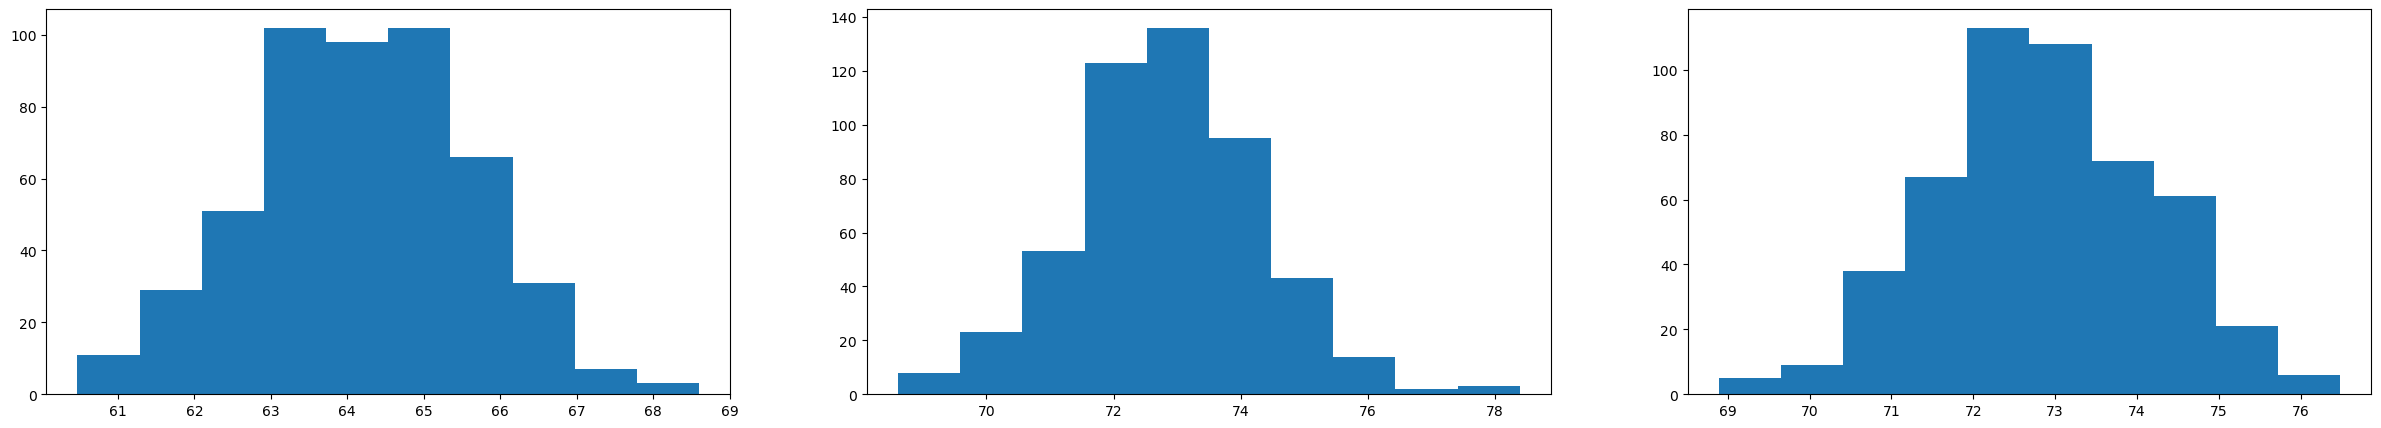

In [22]:
plt.subplots(1,3, figsize=(30,5)) 
scores = ['MathScore_normal', 'WritingScore_normal', 'ReadingScore_normal']
for index, item in enumerate(scores):
    ax = plt.subplot(1, 3, index + 1)
    plt.hist(female_sample[item])

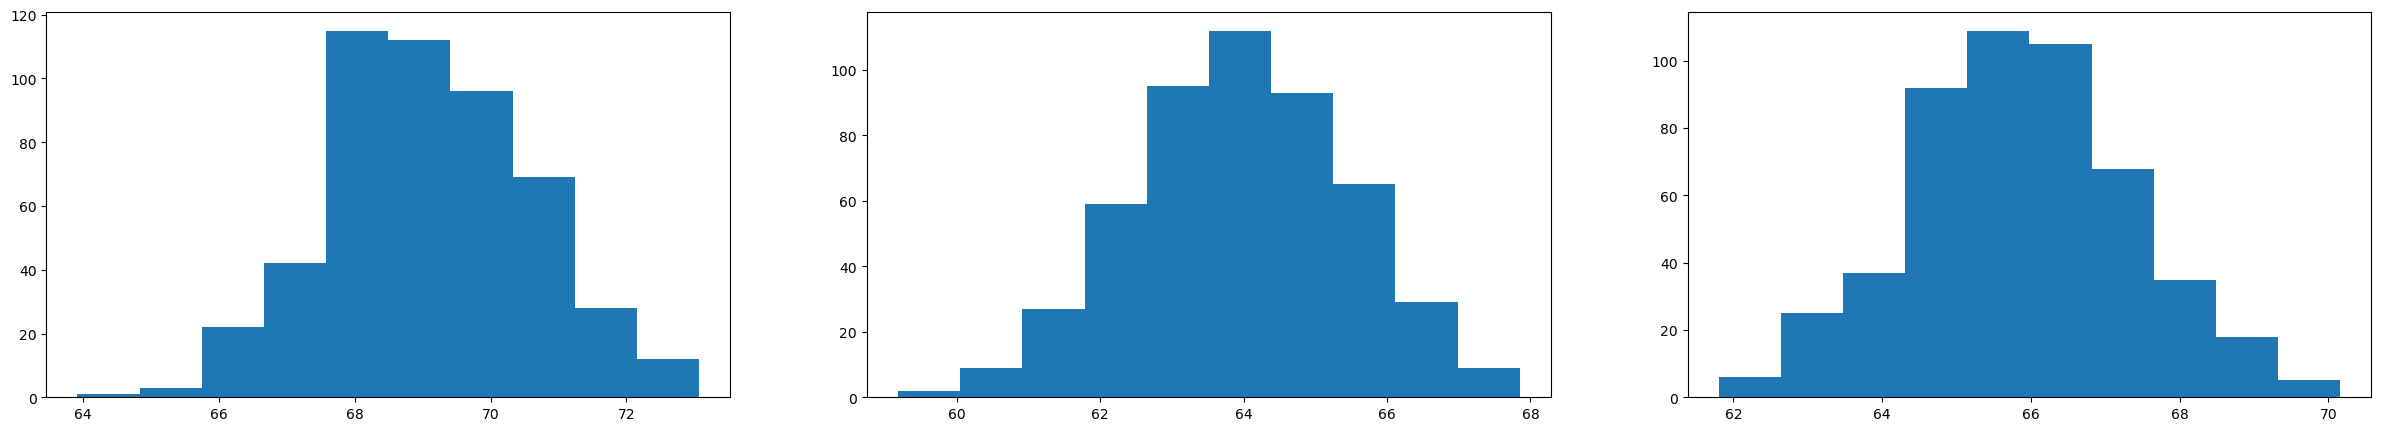

In [23]:
plt.subplots(1,3, figsize=(30,5)) 
scores = ['MathScore_normal', 'WritingScore_normal', 'ReadingScore_normal']
for index, item in enumerate(scores):
    ax = plt.subplot(1, 3, index + 1)
    plt.hist(male_sample[item])

In [24]:
# Mann-Whitney U Test - Tests whether the distributions of two independent samples are equal or not.

from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(female_sample['MathScore_normal'],male_sample['MathScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=1995.500, p=0.000
Probably different distributions


In [25]:
stat, p = mannwhitneyu(female_sample['ReadingScore_normal'],male_sample['ReadingScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=249971.000, p=0.000
Probably different distributions


In [26]:
stat, p = mannwhitneyu(female_sample['WritingScore_normal'],male_sample['WritingScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=250000.000, p=0.000
Probably different distributions


In [27]:
# Wilcoxon Signed-Rank Test - Tests whether the distributions of two paired samples are equal or not.

from scipy.stats import wilcoxon
stat, p = wilcoxon(female_sample['MathScore_normal'],male_sample['MathScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.000, p=0.000
Probably different distributions


In [28]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(female_sample['ReadingScore_normal'],male_sample['ReadingScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


In [29]:
from scipy.stats import wilcoxon
stat, p = wilcoxon(female_sample['WritingScore_normal'],male_sample['WritingScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.000, p=0.000
Probably different distributions


In [30]:
#Kruskal-Wallis H Test - Tests whether the distributions of two or more independent samples are equal or not.

from scipy.stats import kruskal
stat, p = kruskal(female_sample['MathScore_normal'],male_sample['MathScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=725.522, p=0.000
Probably different distributions


In [31]:
from scipy.stats import kruskal
stat, p = kruskal(female_sample['ReadingScore_normal'],male_sample['ReadingScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=748.907, p=0.000
Probably different distributions


In [32]:
from scipy.stats import kruskal
stat, p = kruskal(female_sample['WritingScore_normal'],male_sample['WritingScore_normal'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=749.254, p=0.000
Probably different distributions


# Laboratory exercise 4

In this laboratory exercise you will use the questionnaire and answers given below

In [113]:
import pandas as pd

In [114]:
questionnaire = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                              'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                              'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})

1. Write a function to detrmine the realiability of the questionnaire answers with Cronbach's Alpha.

Cronbach’s alpha is a measure of internal consistency, that is, how closely related a set of items are as a group. It is considered to be a measure of scale reliability. Technically speaking, Cronbach’s alpha is not a statistical test – it is a coefficient of reliability (or consistency). <br>
(https://stats.oarc.ucla.edu/spss/faq/what-does-cronbachs-alpha-mean/ <br>
https://library.virginia.edu/data/articles/using-and-interpreting-cronbachs-alpha)

In [115]:
questionnaire

,Q1,Q2,Q3
0,1,1,1
1,2,1,1
2,2,1,2
3,3,2,1
4,2,3,2
5,2,3,3
6,3,2,3
7,3,3,3
8,2,3,2
9,3,3,3


In [116]:
quest_ext = questionnaire.copy()

In [117]:
# https://library.virginia.edu/data/articles/using-and-interpreting-cronbachs-alpha
# formula
# c_alpha = k/(k-1) * (1 - (sum_var)/(var_total))
# column Total needed

In [118]:
quest_ext['Total'] = quest_ext.sum(axis=1)

In [119]:
quest_ext

,Q1,Q2,Q3,Total
0,1,1,1,3
1,2,1,1,4
2,2,1,2,5
3,3,2,1,6
4,2,3,2,7
5,2,3,3,8
6,3,2,3,8
7,3,3,3,9
8,2,3,2,7
9,3,3,3,9


In [120]:
quest_ext.var()

Q1       0.455556
Q2       0.844444
Q3       0.766667
Total    4.266667
dtype: float64

In [121]:
quest_ext.var()[0]

0.4555555555555556

In [122]:
quest_ext.var()[len(quest_ext.columns)-1]

4.266666666666666

In [123]:
def cronbach_alpha(df):
    
    k = len(df.columns)-1 # columns 1, 2, 3
    
    sum_var = 0
    for i in range(len(df.columns)-1): 
        sum_var += df.var()[i]
        #print(sum_var)

    var_total = df.var()[len(df.columns)-1] # column Total
    
    c_alpha = k/(k-1) * (1 - (sum_var)/(var_total))
    
    return c_alpha

In [124]:
cronbach_alpha(quest_ext)

0.7734375

Cronbach alpha higher than 0.7 is considered  acceptable.

In [125]:
# verification with in-built function

import pingouin as pg
pg.cronbach_alpha(data=questionnaire)

(0.7734375, array([0.336, 0.939]))

2. Explain the differences between in-house data labeling, crowdsourcing and outsourcing. 

Supervised machine learning algorithms require labeled data. Data labeling can be done in-house, be outsourced or crowdsourced. <br> <br> 
In-house data labeling uses data scientists and facilities from the organization that requires data labeling. People need to be trained and facilites built; these are highly time-consuming activities. Pricing is also high; companies need to invest both in hardware and data scientists. In-house data labeling provides high level of security and high level of labeling quality. <br> <br> 
Crowdsourcing implies internet users as labelers of data. The process is fast and cheap. However, no security standard has to be respected (data can be distributed elsewhere) and the quality of labeling may not be very high. reCAPTCHA is an example of crowdsourced data labeling. <br> <br> 
Outsourcing data labeling is an appropriate strategy when dealing with not extremely private data that requires high-quality data labeling. Outsourcing implies that companies hire a third-party: trained experts in data labeling. Price, time and security are higher than with crowdsouring, but lower than with in-house labeling. The quality of labeling is high.

3. Explain the main differences between annotation for image classification, object detection and image segmentation.

Image classification, object detection and image segmentation are computer vision tasks. <br> <br>
Image classification is a task of determining what is shown in an image. The final prediction is the most probable of predetermined classes. Classes may be types of objects, scenes or concepts. Each class has its label. <br> <br>
Object detection looks for (identifies and localizes) certain objects in an image. If found, objects are categorized and distinguished - each object is labeled with a bounding box and given a name depending on the category. The output of an object detection model is a list of objects with their corresponding class labels and bounding box coordinates. <br> <br>
Image segmentation gives each pixel in an image a label depending on which region (or object) it belongs to. The output of a segmentation model is a pixel-wise mask that represents the segmentation boundaries. 

# Laboratory excercise 5

The notebook contains excercise connected to the auditory excerice 6. For any questions feel free to contact assistant: eda.jovicic@fer.hr

In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# set seed for consistency
np.random.seed(2)

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#load data

df = pd.read_csv('students_score_handled.csv', index_col = 0)

In [3]:
df

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,2,2,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. Using linear regression, model the MathScore using features: TestPrep, NrSiblings, ParentMaritalStatus and ReadingScore. 

In [4]:
# Declares the model
# TestPrep - categorical variable (0 or 1)
#  looking at the original dataset - Label Encoder assigns labels following alphabetical order of data (none - 1, completed - 0)
# NrSiblings - discrete 
# ParentMaritalStatus - categorical (0 (divorced), 1 (married), 2 (single), 3 (widowed))
# ReadingScore - discrete


mod = smf.ols(formula='MathScore ~ C(TestPrep) + NrSiblings + C(ParentMaritalStatus) + ReadingScore', data=df)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     9829.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:20:12   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29110   BIC:                         2.095e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       6.2302      0.314     19.867      0.000       5.616       6.845
C(TestPrep)[T.1]                1.1060      0.113      9.807      0.000       0.885       1.327
C(ParentMaritalStatus)[T.1]     0.1733      0.145      1.193      0.233      -0.112       0.458
C(ParentMaritalStatus)[T.2]    -0.1318      0.168     -0.786      0.432      -0.460       0.197
C(ParentMaritalStatus)[T.3]     0.5432      0.396      1.373      0.170      -0.232       1.319
NrSiblings                      0.0155      0.036      0.428      0.668      -0.055       0.086
ReadingScore                    0.8570      0.004    239.510      0.000       0.850       0.864
==============================================================================
Omnibus:                      233.486   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.618
Skew:                          -0.010   Prob(JB):                     1.61e-34
Kurtosis:                       2.642   Cond. No.                         562.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Questions:

a) Using the summary, write down the formula with coefficients

$MathScore = 6.2302 + 1.1060 * TestPrep + 0.1733 * ParentMaritalStatus[T.1] + (-0.1318) * ParentMaritalStatus[T.2] + 0.5432 * ParentMaritalStatus[T.3] + 0.0155 * NrSiblings + 0.8570 * ReadingScore$


In [5]:
# I reversed the labels of TestPrep so that "completed" is 1, and "none" is 0 and tried the model like that
df['TestPrep'] = 1 - df['TestPrep']

In [6]:
df

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,0,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,0,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,0,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,0,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,0,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,0,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,0,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,2,2,1,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,1,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


In [7]:
mod = smf.ols(formula='MathScore ~ C(TestPrep) + NrSiblings + C(ParentMaritalStatus) + ReadingScore', data=df)

res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     9829.
Date:                Sat, 06 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:21:50   Log-Likelihood:            -1.0471e+05
No. Observations:               29117   AIC:                         2.094e+05
Df Residuals:                   29110   BIC:                         2.095e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       7.3362      0.287     25.521      0.000       6.773       7.900
C(TestPrep)[T.1]               -1.1060      0.113     -9.807      0.000      -1.327      -0.885
C(ParentMaritalStatus)[T.1]     0.1733      0.145      1.193      0.233      -0.112       0.458
C(ParentMaritalStatus)[T.2]    -0.1318      0.168     -0.786      0.432      -0.460       0.197
C(ParentMaritalStatus)[T.3]     0.5432      0.396      1.373      0.170      -0.232       1.319
NrSiblings                      0.0155      0.036      0.428      0.668      -0.055       0.086
ReadingScore                    0.8570      0.004    239.510      0.000       0.850       0.864
==============================================================================
Omnibus:                      233.486   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.618
Skew:                          -0.010   Prob(JB):                     1.61e-34
Kurtosis:                       2.642   Cond. No.                         560.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The formula with coefficients now is

$MathScore = 7.3362 + (-1.1060) * TestPrep + 0.1733 * ParentMaritalStatus[T.1] + (-0.1318) * ParentMaritalStatus[T.2] + 0.5432 * ParentMaritalStatus[T.3] + 0.0155 * NrSiblings + 0.8570 * ReadingScore$


b) Are there any statisticaly important features?

When p value is less than or equal to 0.05, feature is statistically significant. Then, there is a 5 % (or less) chance that the feature (independent variable) has no affect on the dependent variable, and that the results are produced by chance.

TestPrep and ReadingScore have a p value < 0.001 so they can be interpreted as statistically significant.


c) Let's interpret the data, if students do test preparation, how does that affect the outcome on the math exam? 

If students do test preparation, they will have smaller MathScore by 1.1060 than those who do not prepare. With originally altered dataset, Label Encoder assigned 1 to "none" (no preparation) and 0 to "completed" (with preparation) because Label Encoder assigns labels following alphabetical order of data. The same conclusion can be drawn when I reversed the labels of TestPrep so that "completed" means 1, and "none" means 0. Maybe preparation was needed for students with lower scores and lower interest in general so they were the ones with the lower score on the exam in the end.

$MathScore = 6.2302 + 1.1060 * TestPrep$

$MathScore = 7.3362 + (-1.1060) * TestPrep$ (with reversed labels)

d) Are students who practice sport better at math exams or worse? Using linear regression, model the MathScore using only one feature: PracticeSport. Don't include intercept. Using summary, decide which students do the best at math exams - those who never practice sport, sometimes practice sport or those who do it regularly?

In [8]:
# Declare the model

# PracticeSport - 3 possible levels: never (0), regularly (1), sometimes (2)
# a categorical variable (also called qualitative variable) is a variable that can take on one of a limited, 
# and usually fixed, number of possible values, assigning each individual or other unit of observation 
# to a particular group or nominal category on the basis of some qualitative property.

# without intercept (-1)

mod2 = smf.ols(formula='MathScore ~ C(PracticeSport)-1', data=df)

res2 = mod2.fit()

res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MathScore   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     87.35
Date:                Sat, 06 Jan 2024   Prob (F-statistic):           1.51e-38
Time:                        01:28:51   Log-Likelihood:            -1.2074e+05
No. Observations:               29117   AIC:                         2.415e+05
Df Residuals:                   29114   BIC:                         2.415e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
C(PracticeSport)[0]    64.1576      0.244    262.426      0.000      63.678      64.637
C(PracticeSport)[1]    67.8441      0.150    452.998      0.000      67.551      68.138
C(PracticeSport)[2]    66.2896      0.126    526.520      0.000      66.043      66.536
==============================================================================
Omnibus:                      234.462   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.722
Skew:                          -0.171   Prob(JB):                     2.36e-47
Kurtosis:                       2.756   Cond. No.                         1.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Best at math exams are students who practice sport regularly (C(PracticeSport)[1]) because the coefficient with this category is the highest (67.8441).

# Laboratory exercise 6

The notebook contains exercises connected to auditory exercise 7. For any questions feel free to contact assistant: eda.jovicic@fer.hr

The main task of this notebook is to make predictions using supported learning with the Scikit Learn library. The goal is to predict the grade in Math considering other features of the student.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

1. Load the cleaned dataset from the first exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
#solution

df = pd.read_csv('students_score_handled.csv', index_col=0)

In [3]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0


2. Transform the MathScore feature into grades (1-5) using the following scoring system:

|   MathScore |  Grade  |
| ----------- | ------- |
|  88 - 100   |    5    |
|  75 - 87    |    4    |
|  63 - 74    |    3    |
|  50 - 62    |    2    |
|   0 - 49    |    1    |

In [4]:
#solution

def fun_transf(x):
    if x in range(0,50):
        return 1
    elif x in range(50,63):
        return 2
    elif x in range(63,75):
        return 3
    elif x in range(75,88):
        return 4
    else:
        return 5
    
df['MathScore'] = df['MathScore'].map(lambda x:fun_transf(x))

In [5]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,3,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,3,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,4,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,1,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,4,78,75,0.0,1.0,0.0,1.0


3. Divide the dataset into features (X) and predictions (y). For features we will use all the columns except MathScore, ReadingScore and WritingScore. For predictions we will use the MathScore column. Split the dataset into training and testing sets. The split should be done in a  70-30% ratio.

In [9]:
#X (all features except MathScore, ReadingScore, WritingScore)
#feature_cols = ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMartialStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'Gender_female', 'Gender_male', 'LunchType_free/reduced', 'LunchType_standard']
feature_cols = df.columns[~df.columns.isin(['MathScore', 'ReadingScore', 'WritingScore'])].values.tolist()
feature_cols
X = df[feature_cols]
y = df['MathScore']

In [10]:
#splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

4. Create a Random Forest model, with max_depth=5 and n_estimators=20. Train the model using training set, and then test it on testing set. Display the confusion matrix. Show precision, recall and F1 score for all grades. 

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.53      0.06      0.10      1174
           2       0.35      0.42      0.38      2200
           3       0.33      0.57      0.42      2547
           4       0.36      0.27      0.31      2027
           5       0.00      0.00      0.00       788

    accuracy                           0.35      8736
   macro avg       0.32      0.27      0.24      8736
weighted avg       0.34      0.35      0.31      8736



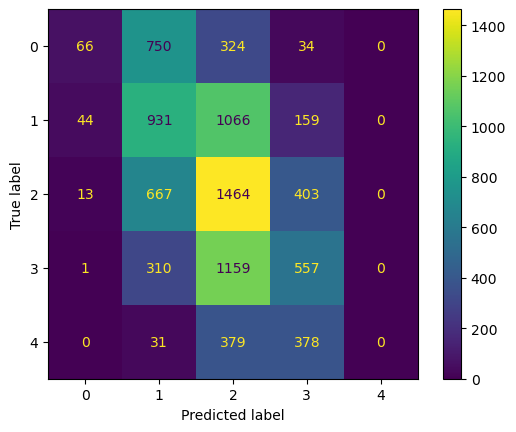

In [35]:
#Random Forest model

#from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))


5. The accuracy of our model is not the best. The reason could be having too many possible classes (grades). Let's transform the data again, but this time, instead of predicting grades, we want to predict whether the student will pass (grades 2, 3, 4 and 5) or fail (grade 1) math. After transforming the MathScore accordingly (0 - failed, 1 - passed), repeat task 4 and compare the results.

In [36]:
df['MathScore'].value_counts()

MathScore
3    8503
2    7393
4    6626
1    4016
5    2579
Name: count, dtype: int64

In [37]:
#transform grades into failed (0) or passed (1) 

df.loc[df['MathScore'] == 1, 'MathScore'] = 0
df.loc[df['MathScore'] >= 2, 'MathScore'] = 1



In [38]:
df.head()

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,1,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,1,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,1,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,0,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,1,78,75,0.0,1.0,0.0,1.0


In [39]:
# feature_cols and X stay the same
y = df['MathScore']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivana\anaconda3\envs\proba1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1174
           1       0.87      1.00      0.93      7562

    accuracy                           0.87      8736
   macro avg       0.43      0.50      0.46      8736
weighted avg       0.75      0.87      0.80      8736



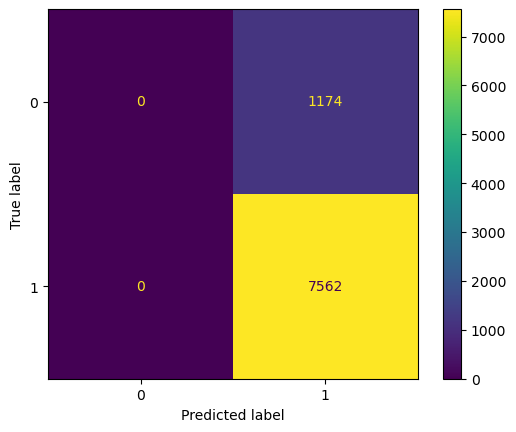

In [41]:
#Random Forest model

clf = RandomForestClassifier(max_depth=5, random_state=0, n_estimators=20)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cm=confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

print(classification_report(y_test, y_pred))


6. Compare the results. Did our model work better in the first case or the second? Explain why and suggest a way to improve it.

The model worked better in the first case. In the confusion matrix, some grades are well guessed, but we also have false predictions In the second case, the model estimated that all test students have passed. It is not weird. As can be seen with ```df['MathScore'].value_counts()```, in the entire dataset grade 2 deserved 7393 students, grade 3 8503, grade 4 6626, and grade 5 2579 students. 4016 students have failed. If we count all the students that have passed, we obtain 25101 student. There are 29117 students in total. 13.79% of students have failed. The dataset is imbalanced for this type of predictions.

To fight imbalanced dataset, we could assign different weights to different classes. The minority class should be assigned a higher weight (and thus higher misclassification cost) to reduce bias towards the majority class. In sklearn, there is ```class weight``` parameter that assigns weights to each class.

Also, oversampling of the minority class or undersampling the majority class could be done.